In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_1 = pd.read_csv(r'C:\Users\batman\Desktop\titanic dataset\train.csv')
df_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_full = df_1.set_index('PassengerId')
df_full

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


EDA 

In [4]:
df_full.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy = 'median')

df_full["Age"] = impute.fit_transform(df_full["Age"].to_numpy().reshape(-1,1))
df_full

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
#dropping cabin column as alot of null values present 
#ticket column doen not seem of much use
df = df_full.drop(columns =['Cabin','Ticket','Name'])
df.dropna(axis=0, how ='any' ,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
list2 = ['Sex','Embarked']
for i in list2:
    df[i] = le.fit_transform(df[i].to_numpy().reshape(-1,1))
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,2
888,1,1,0,19.0,0,0,30.0000,2
889,0,3,0,28.0,1,2,23.4500,2


In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

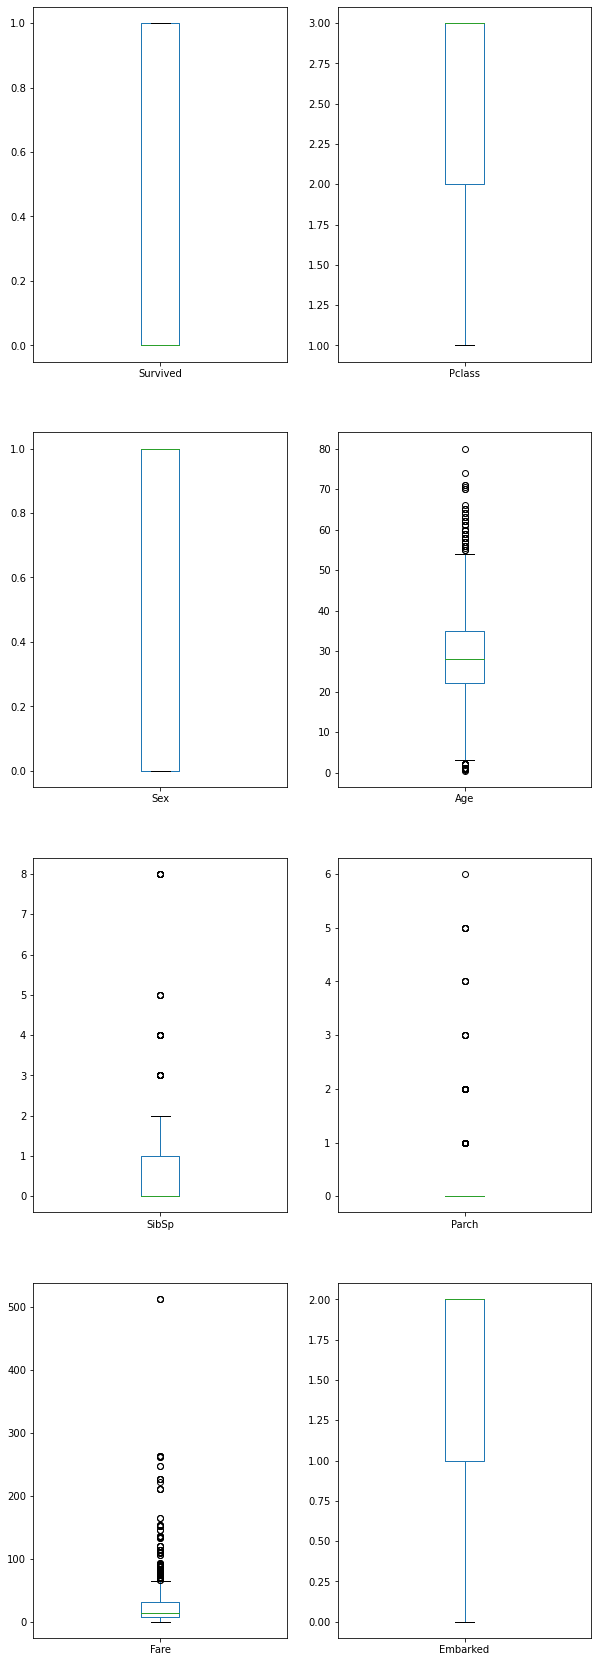

In [9]:
df.plot(kind='box',figsize=(10,30),subplots=True,layout=(4,2))
plt.show()

In [10]:
z = np.abs(zscore(df))
z

array([[0.78696114, 0.82520863, 0.73534203, ..., 0.47432585, 0.50023975,
        0.58683958],
       [1.27071078, 1.57221121, 1.35991138, ..., 0.47432585, 0.78894661,
        1.93955453],
       [1.27071078, 0.82520863, 1.35991138, ..., 0.47432585, 0.48664993,
        0.58683958],
       ...,
       [0.78696114, 0.82520863, 1.35991138, ..., 2.00611934, 0.17408416,
        0.58683958],
       [1.27071078, 1.57221121, 0.73534203, ..., 0.47432585, 0.0422126 ,
        1.93955453],
       [0.78696114, 0.82520863, 0.73534203, ..., 0.47432585, 0.49017322,
        0.67635748]])

In [11]:
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  67,  70,  85,  87,  95, 115, 117,
        118, 158, 163, 166, 170, 179, 181, 200, 232, 257, 260, 265, 277,
        298, 310, 323, 340, 359, 376, 379, 385, 436, 437, 437, 479, 492,
        526, 540, 541, 556, 566, 609, 629, 637, 671, 677, 678, 682, 685,
        688, 699, 715, 729, 735, 736, 741, 744, 773, 778, 786, 791, 812,
        823, 844, 848, 849, 856, 861, 883], dtype=int64),
 array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
        6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
        5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
        4, 4, 3, 5, 4, 5], dtype=int64))

In [12]:
df_new = df[(z<3).all(axis=1)]
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,2
888,1,1,0,19.0,0,0,30.0000,2
889,0,3,0,28.0,1,2,23.4500,2


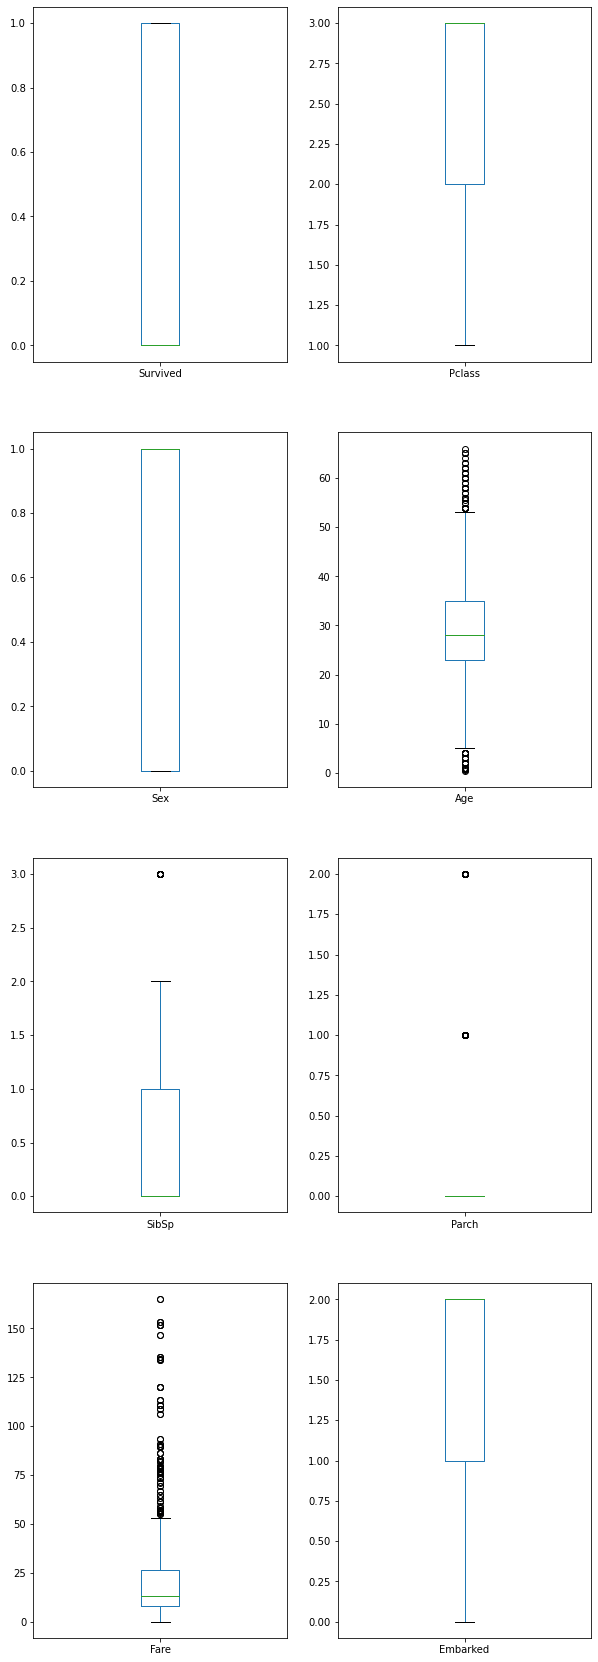

In [13]:
df_new.plot(kind='box',subplots=True,figsize=(10,30),layout=(4,2))
plt.show()

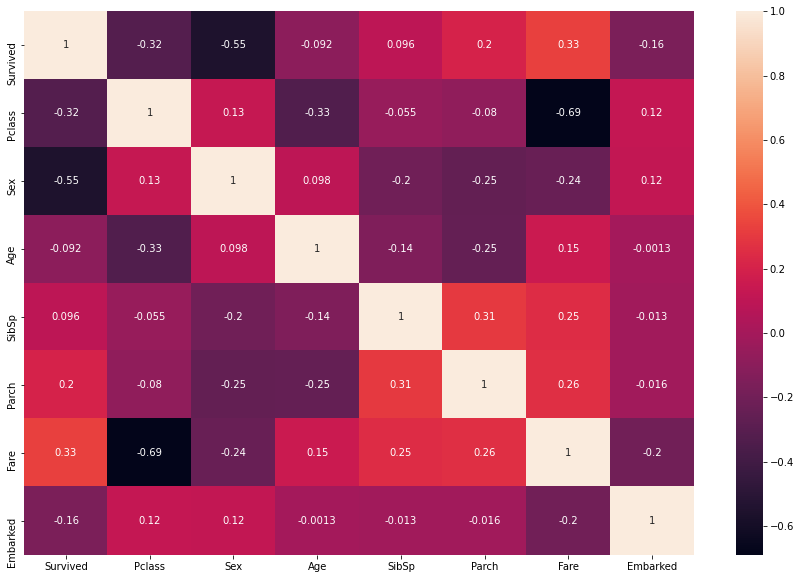

In [14]:
corr_hmap = df_new.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [15]:
#sns.pairplot(df_new)
#plt.show()

In [16]:
corr_hmap

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.319048,-0.553009,-0.091795,0.096403,0.202888,0.326829,-0.157142
Pclass,-0.319048,1.000000,0.133391,-0.333008,-0.054688,-0.080384,-0.689576,0.124844
Sex,-0.553009,0.133391,1.000000,0.098066,-0.201663,-0.254059,-0.239992,0.119011
Age,-0.091795,-0.333008,0.098066,1.000000,-0.142306,-0.251148,0.153641,-0.001294
SibSp,0.096403,-0.054688,-0.201663,-0.142306,1.000000,0.306784,0.250832,-0.012974
Parch,0.202888,-0.080384,-0.254059,-0.251148,0.306784,1.000000,0.263038,-0.015551
Fare,0.326829,-0.689576,-0.239992,0.153641,0.250832,0.263038,1.000000,-0.196032
Embarked,-0.157142,0.124844,0.119011,-0.001294,-0.012974,-0.015551,-0.196032,1.000000


In [17]:
df_new.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000
mean,0.388753,2.314181,0.658924,29.394462,0.349633,0.255501,25.703621,1.539120
std,0.487765,0.825137,0.474361,12.131223,0.619951,0.565859,29.733184,0.789503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,13.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,26.550000,2.000000
max,1.000000,3.000000,1.000000,66.000000,3.000000,2.000000,164.866700,2.000000


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [19]:
y = df_new.loc[:,'Survived']
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 818, dtype: int64

In [20]:
x = df_new.drop(columns='Survived')
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,2
2,1,0,38.0,1,0,71.2833,0
3,3,0,26.0,0,0,7.9250,2
4,1,0,35.0,1,0,53.1000,2
5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
887,2,1,27.0,0,0,13.0000,2
888,1,0,19.0,0,0,30.0000,2
889,3,0,28.0,1,2,23.4500,2


In [21]:
x  = df_new.drop(columns='Survived')
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,2
2,1,0,38.0,1,0,71.2833,0
3,3,0,26.0,0,0,7.9250,2
4,1,0,35.0,1,0,53.1000,2
5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
887,2,1,27.0,0,0,13.0000,2
888,1,0,19.0,0,0,30.0000,2
889,3,0,28.0,1,2,23.4500,2


In [22]:
y = df_new.loc[:,'Survived']
y.shape

(818,)

Plan
- first we will determine best fit model with particular 
- then we will select the best model 
- with that model we will check and maximize accuracy and hence save file

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_x = sc.fit_transform(x)
df_x = pd.DataFrame(df_x,columns=x.columns)

In [24]:
df_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.831666,0.719462,-0.609913,1.049704,-0.451805,-0.621020,0.584117
1,-1.593656,-1.389928,0.709805,1.049704,-0.451805,1.533894,-1.950672
2,0.831666,-1.389928,-0.279983,-0.564314,-0.451805,-0.598305,0.584117
3,-1.593656,-1.389928,0.462358,1.049704,-0.451805,0.921971,0.584117
4,0.831666,0.719462,0.462358,-0.564314,-0.451805,-0.594098,0.584117
...,...,...,...,...,...,...,...
813,-0.380995,0.719462,-0.197501,-0.564314,-0.451805,-0.427515,0.584117
814,-1.593656,-1.389928,-0.857360,-0.564314,-0.451805,0.144586,0.584117
815,0.831666,-1.389928,-0.115019,1.049704,3.084809,-0.075841,0.584117
816,-1.593656,0.719462,-0.279983,-0.564314,-0.451805,0.144586,-1.950672


In [25]:
def best_parameter(model,para):
    from sklearn.model_selection import GridSearchCV
    
    grd = GridSearchCV(model,para,cv=10)
    grd.fit(df_x,y)
    return [grd.best_params_, grd.best_score_]
    
    

In [26]:
#DECISION TREE
dtc = DecisionTreeClassifier()
para ={
    'criterion':['gini','entropy'],
    'splitter':['best','random']
}
best_parameter(dtc,para)

[{'criterion': 'gini', 'splitter': 'best'}, 0.7849442938873834]

In [27]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
para = {
    'n_estimators':list(range(1,20)),
    'criterion':['gini','ensemble']
}
best_parameter(model,para)

[{'criterion': 'gini', 'n_estimators': 11}, 0.8069256248118037]

In [28]:
#KNN
print("Model KNN: \n")
model=KNeighborsClassifier()
para = {
    'n_neighbors':list(range(1,20)),
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'weights':['uniform','distance']
}
best_parameter(model,para)

Model KNN: 



[{'algorithm': 'brute', 'n_neighbors': 14, 'weights': 'uniform'},
 0.812962962962963]

In [29]:
#this is not working and will cause an error
#model = SVC()
#para = {
    #'kernel':['rbf','poly','linear'],
    #'gamma':['scale','auto'],
    #'C':list(range(1,10))
#}
#best_parameter(model,para)

#Logistic Regression
lg = LogisticRegression()
cv_s = cross_val_score(lg,df_x,y,scoring='accuracy',cv=10)
cv_s.mean()

0.7922011442336646

In [30]:
#GradientBoostingClassifier
gbc = GradientBoostingClassifier()
para = {
    'learning_rate':[0.001,0.01,0.1,1],
    'n_estimators':[100,1050,100]
}
best_parameter(gbc,para)

[{'learning_rate': 0.1, 'n_estimators': 100}, 0.8251881963264077]

In [32]:
#Maximum accuracy in Gradient Boosting Classifier
gbc = GradientBoostingClassifier(learning_rate=0.1,n_estimators=100)
cv_score = cross_val_score(gbc,df_x,y,cv=10,scoring='accuracy')
cv_score.mean()

0.8239686841312859

In [35]:
from sklearn.externals import joblib
joblib.dump(gbc, 'gbc_titanic.pkl')

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\__init__.py)

In [ ]:
#AdaBosstClassifier
abc =AdaBoostClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
para = {
    'base_estimator':[abc,rfc],
    'n_estimators':list(range(100,1010,100)),
    'learning_rate':[0.001,0.01,0.1,1],
    'random_state':list(range(10,100,10))
}
#best_parameter(abc,para)